#Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso

#Reading the dataset to the notebook

In [2]:
df = pd.read_csv("train.csv")

In [3]:
#Showing the dataset
df

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,MSC_83537.0,Estrellitas y Duendes,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,Scale E,0.147134,-14.140,NaN,Major,0.046404,143.788,Band,0.598965,Jazz
1,MSC_22044.0,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000030,Scale A,0.174655,-13.716,Male,?,0.039949,?,Band,0.357194,Jazz
2,MSC_62017.0,Yeah! (feat. Lil Jon & Ludacris),89.023,0.020041,0.967948,273314.723,0.857411,0.000000,Scale D,0.042030,-4.995,Female,Major,0.119917,105.018,Band,0.635525,Rap
3,MSC_76365.0,Can’t You See,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,Scale D,0.124637,-4.262,Both,Major,0.167493,?,Duet,0.983750,Rock
4,MSC_71493.0,"Sonata III (G Moll), BWV 1029: Adagio",45.095,0.858769,0.280645,410136.987,0.114732,0.002753,Scale F Sharp,0.134782,-26.922,Female,Minor,0.039139,112.183,Band,0.074412,Classical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15676,MSC_73047.0,I. Andante,0.000,0.866988,0.387476,-1.000,0.196799,0.028725,Scale B,0.248399,-16.331,Female,Major,0.045251,123.516,Band,0.624518,Classical
15677,MSC_34472.0,Only Trust Your Heart,40.514,0.883333,0.459917,378128.464,0.349263,0.000519,Scale F,0.681492,-25.087,Both,Major,0.448377,129.445,Duet,0.609022,Jazz
15678,MSC_32827.0,Moment's Notice,35.082,0.905281,0.566619,581799.061,0.543673,0.209238,Scale D Sharp,0.416611,-10.246,Female,Major,0.040625,123.17,NaN,0.869294,Jazz
15679,MSC_89976.0,Such Small Scenes,59.693,0.113408,0.644554,151226.592,0.912201,0.000089,Scale F,0.166336,-7.257,Both,Minor,0.060308,116.077,Duet,0.402700,Rock


In [4]:
#Showing the first 7 rows
df.head(7)

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,MSC_83537.0,Estrellitas y Duendes,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,Scale E,0.147134,-14.140,NaN,Major,0.046404,143.788,Band,0.598965,Jazz
1,MSC_22044.0,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000030,Scale A,0.174655,-13.716,Male,?,0.039949,?,Band,0.357194,Jazz
2,MSC_62017.0,Yeah! (feat. Lil Jon & Ludacris),89.023,0.020041,0.967948,273314.723,0.857411,0.000000,Scale D,0.042030,-4.995,Female,Major,0.119917,105.018,Band,0.635525,Rap
3,MSC_76365.0,Can’t You See,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,Scale D,0.124637,-4.262,Both,Major,0.167493,?,Duet,0.983750,Rock
4,MSC_71493.0,"Sonata III (G Moll), BWV 1029: Adagio",45.095,0.858769,0.280645,410136.987,0.114732,0.002753,Scale F Sharp,0.134782,-26.922,Female,Minor,0.039139,112.183,Band,0.074412,Classical
5,MSC_30580.0,Una Pàgina per Chopin,NaN,1.047458,0.436620,149956.385,0.015206,0.960473,Scale G Sharp,0.161042,-28.116,NaN,Major,0.043902,136.232,Duet,0.156638,Classical
6,MSC_28346.0,Love More,64.265,0.000459,0.968723,203145.857,-1.000000,0.000384,Scale C Sharp,0.079220,-7.266,Male,Major,0.052014,104.957,Band,0.484246,Rap


In [5]:
df.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
popularity,1.000000,-0.561754,0.451006,-0.156325,0.292947,-0.490861,-0.000515,0.524055,0.198799,0.303349
acousticness,-0.561754,1.000000,-0.542211,0.140062,-0.474905,0.527024,-0.117700,-0.723621,-0.235863,-0.403179
danceability,0.451006,-0.542211,1.000000,-0.232411,0.274458,-0.427831,0.018638,0.530223,0.336179,0.557894
duration_ms,-0.156325,0.140062,-0.232411,1.000000,-0.084873,0.180080,-0.015489,-0.145997,-0.108404,-0.192822
energy,0.292947,-0.474905,0.274458,-0.084873,1.000000,-0.303598,0.105671,0.448962,0.108670,0.297968
instrumentalness,-0.490861,0.527024,-0.427831,0.180080,-0.303598,1.000000,-0.144130,-0.556341,-0.249229,-0.343375
liveness,-0.000515,-0.117700,0.018638,-0.015489,0.105671,-0.144130,1.000000,0.131014,0.135626,0.073618
loudness,0.524055,-0.723621,0.530223,-0.145997,0.448962,-0.556341,0.131014,1.000000,0.209753,0.429697
speechiness,0.198799,-0.235863,0.336179,-0.108404,0.108670,-0.249229,0.135626,0.209753,1.000000,0.126169
valence,0.303349,-0.403179,0.557894,-0.192822,0.297968,-0.343375,0.073618,0.429697,0.126169,1.000000


In [6]:
#Shape of the Dataset
df.shape

(15681, 18)

In [8]:
#Information about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15681 entries, 0 to 15680
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instance_id        15681 non-null  object 
 1   track_name         15681 non-null  object 
 2   popularity         15039 non-null  float64
 3   acousticness       15681 non-null  float64
 4   danceability       15125 non-null  float64
 5   duration_ms        15587 non-null  float64
 6   energy             15587 non-null  float64
 7   instrumentalness   15586 non-null  float64
 8   key                15681 non-null  object 
 9   liveness           15681 non-null  float64
 10  loudness           15645 non-null  float64
 11  voice_gender       14916 non-null  object 
 12  mode               15646 non-null  object 
 13  speechiness        15655 non-null  float64
 14  tempo              15681 non-null  object 
 15  musician_category  14321 non-null  object 
 16  valence            150

In [9]:
#Describinhg the dataset
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,15039.000000,15681.000000,15125.000000,1.558700e+04,15587.000000,15586.000000,15681.000000,15645.000000,15655.000000,15004.000000
mean,50.822720,0.446922,0.570106,2.480008e+05,0.426977,0.264290,0.194089,-11.621471,0.096411,0.451400
std,17.679789,0.416981,0.215045,1.568312e+05,0.514145,0.395788,0.160291,8.663364,0.105647,0.277220
min,0.000000,0.000002,0.063962,-1.000000e+00,-1.000000,0.000000,0.016652,-50.054000,0.023858,0.000000
25%,39.017000,0.044521,0.418635,1.860163e+05,0.158277,0.000000,0.101674,-15.504000,0.039549,0.212242
50%,54.109000,0.295272,0.586114,2.362127e+05,0.560389,0.000719,0.128784,-8.611000,0.050425,0.432478
75%,63.449000,0.929001,0.733073,2.975593e+05,0.791881,0.638930,0.228973,-5.715000,0.094230,0.665369
max,108.512000,1.094410,1.072089,3.410383e+06,1.094853,1.078601,1.080959,1.389000,1.000445,1.076971


In [10]:
#Showing the number of null values in each column
df.isna().sum()

instance_id             0
track_name              0
popularity            642
acousticness            0
danceability          556
duration_ms            94
energy                 94
instrumentalness       95
key                     0
liveness                0
loudness               36
voice_gender          765
mode                   35
speechiness            26
tempo                   0
musician_category    1360
valence               677
music_genre             0
dtype: int64

#Cleaning the missing values in each columns

In [11]:
df['popularity'].fillna(df['popularity'].mode().values[0],inplace=True)
df['danceability'].fillna(df['danceability'].mode().values[0],inplace=True)
df['duration_ms'].fillna(df['duration_ms'].mode().values[0],inplace=True)
df['energy'].fillna(df['energy'].mode().values[0],inplace=True)
df['instrumentalness'].fillna(df['instrumentalness'].mode().values[0],inplace=True)
df['loudness'].fillna(df['loudness'].mode().values[0],inplace=True)
df['voice_gender'].fillna(df['voice_gender'].mode().values[0],inplace=True)
df['mode'].fillna(df['mode'].mode().values[0],inplace=True)
df['speechiness'].fillna(df['speechiness'].mode().values[0],inplace=True)
df['musician_category'].fillna(df['musician_category'].mode().values[0],inplace=True)
df['valence'].fillna(df['valence'].mode().values[0],inplace=True)
df.isna().sum()

instance_id          0
track_name           0
popularity           0
acousticness         0
danceability         0
duration_ms          0
energy               0
instrumentalness     0
key                  0
liveness             0
loudness             0
voice_gender         0
mode                 0
speechiness          0
tempo                0
musician_category    0
valence              0
music_genre          0
dtype: int64

In [12]:
#target variable is popularity score
target=df['popularity']

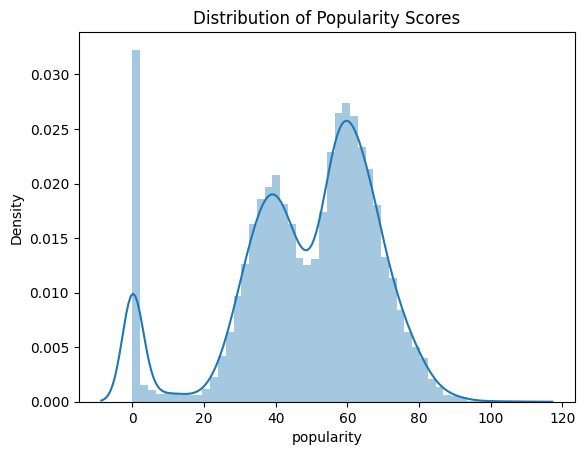

In [13]:
#distribution plot of target variable
sns.distplot(target)
plt.title('Distribution of Popularity Scores')

plt.show()

#The relationships look between each feature and my target variable

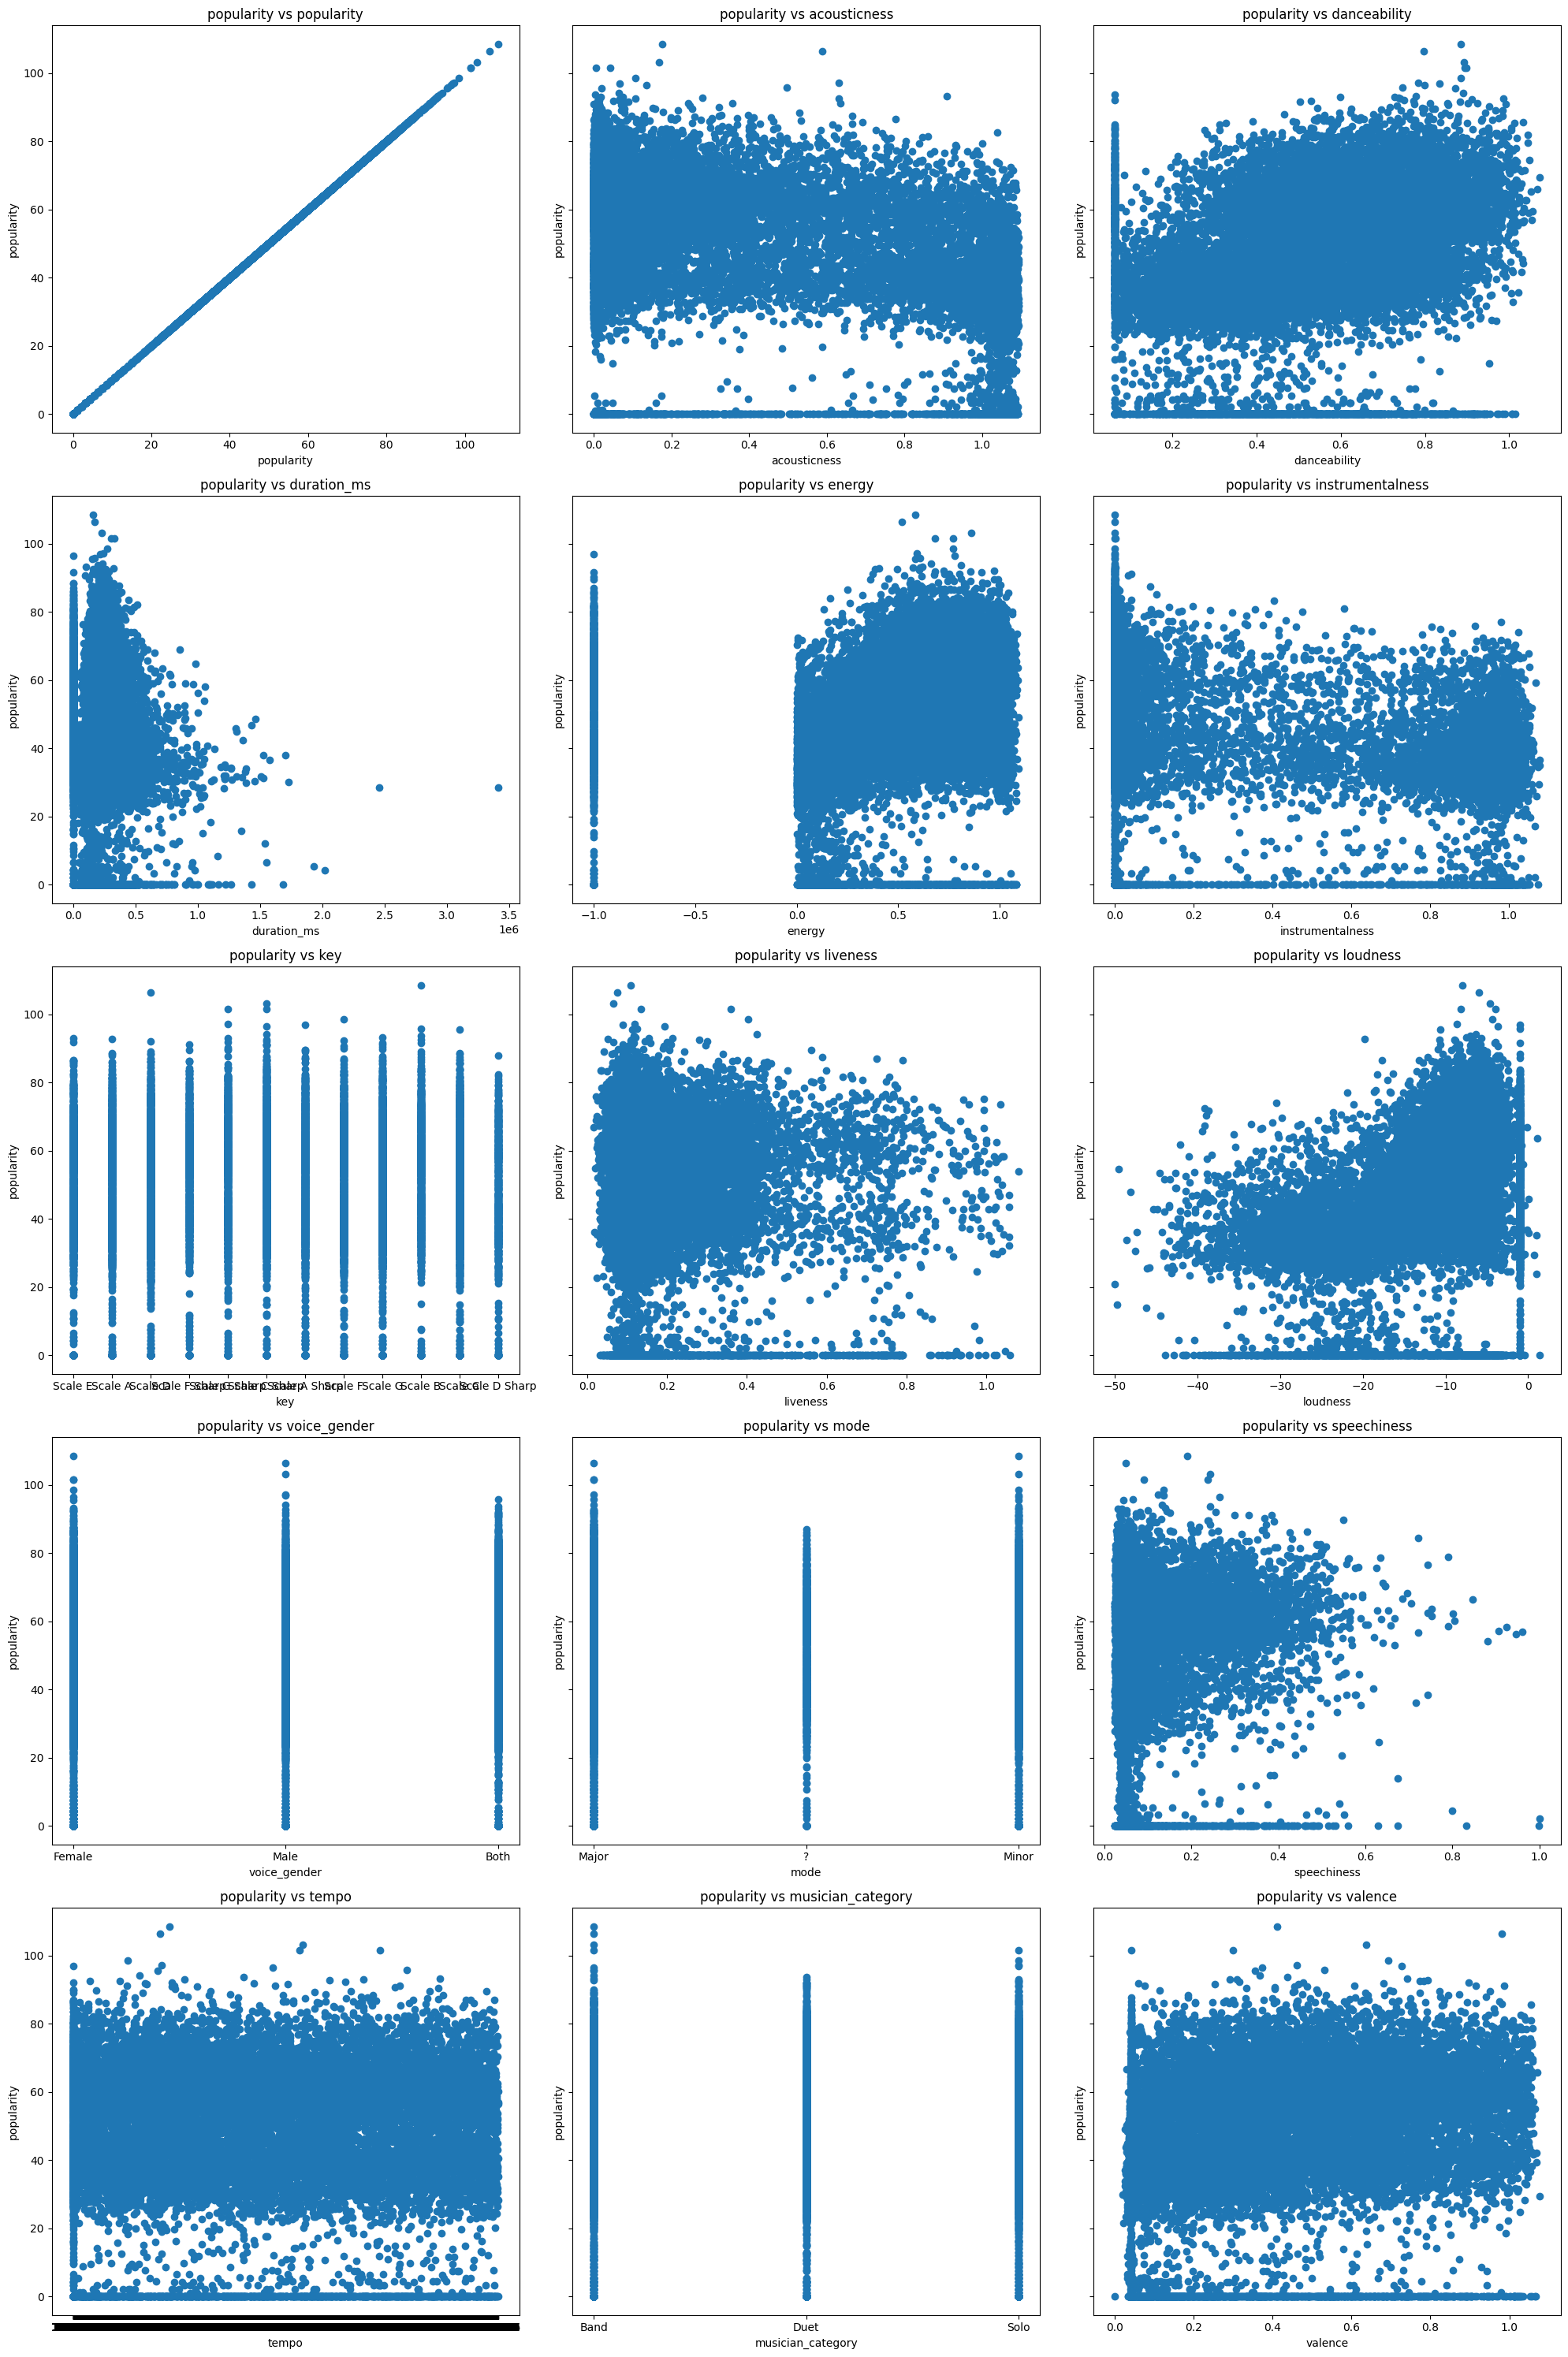

In [14]:
#scatterplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20,30), sharey=True)

for ax, column in zip(axes.flatten(), df.columns[2:17]):
    ax.scatter(df[column], df['popularity'], label=column, alpha=1)
    ax.set_title(f'popularity vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('popularity')

fig.tight_layout()

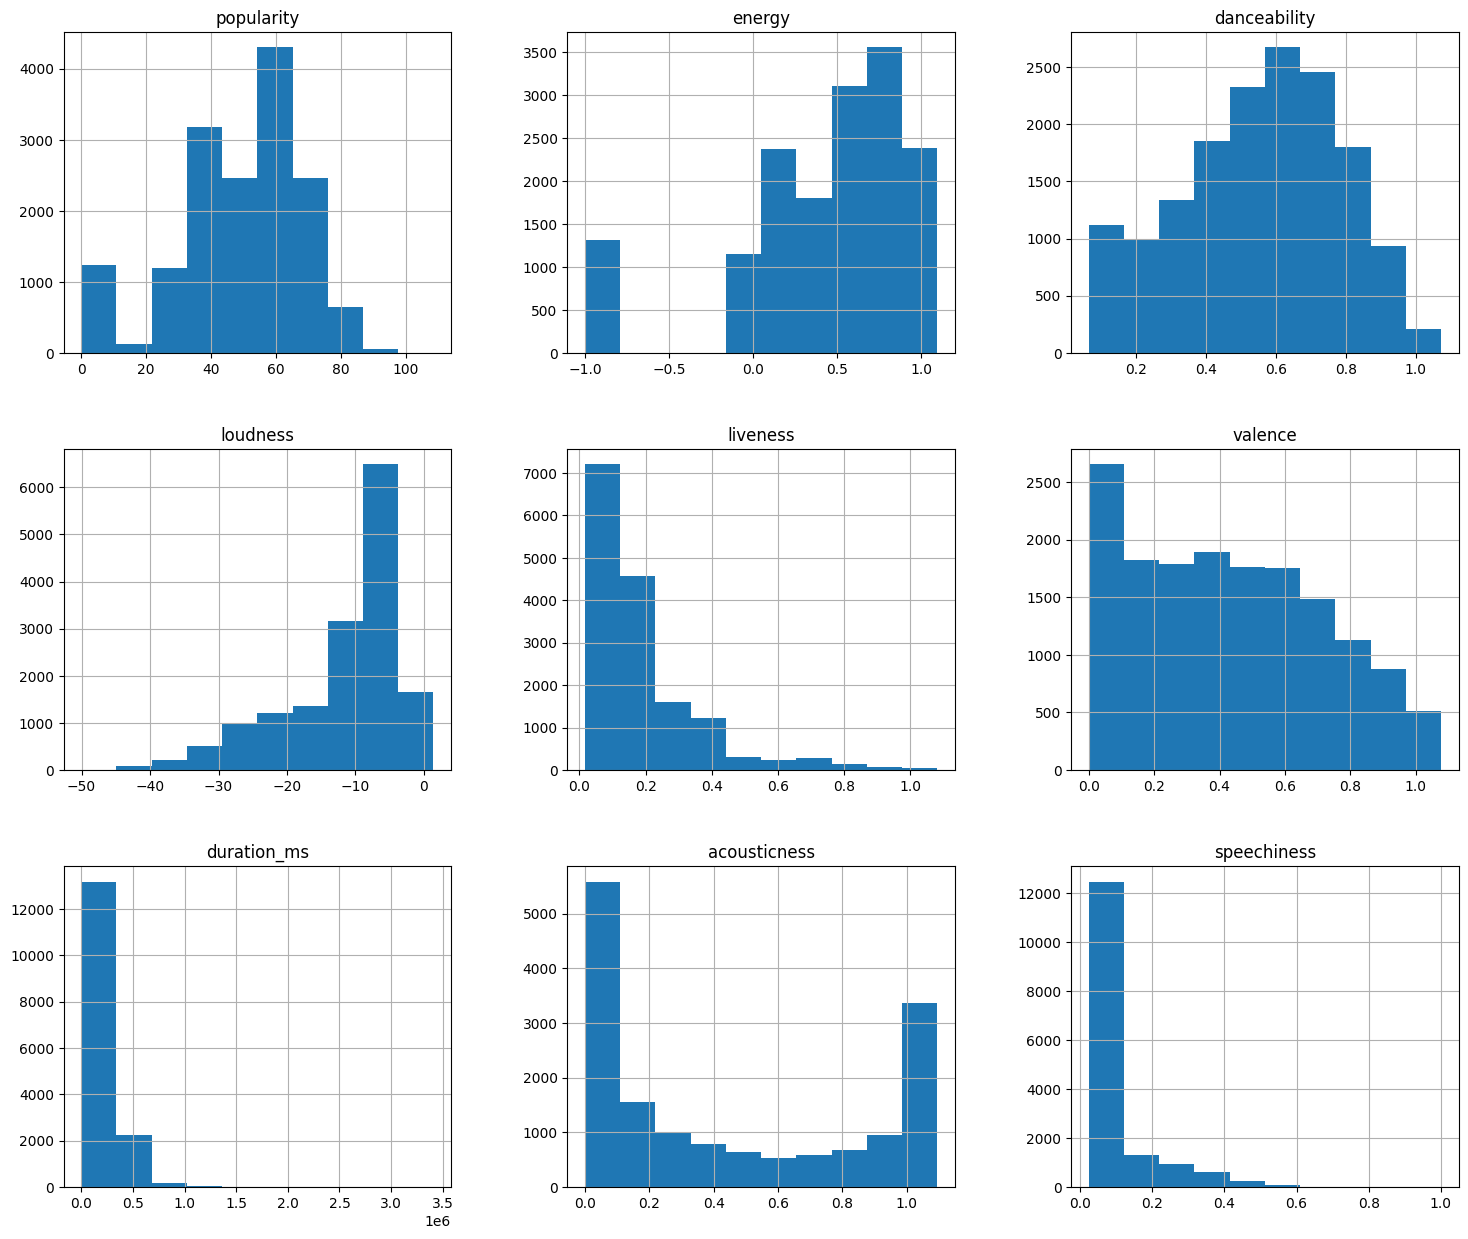

In [15]:
#histogram for all features except genre dummies
#most features are normally distributed
#transformations should be considered
df[['popularity', 'energy', 'danceability', 'loudness',
       'liveness', 'valence', 'duration_ms', 'acousticness', 'speechiness',]].hist(figsize=(18,15))
ax.ticklabel_format(style='plain')

plt.show()

In [16]:
#dropping categoricals that will not be used
df3=df.drop(columns=['instance_id','track_name','key','mode','musician_category','voice_gender','tempo','music_genre'], axis=1)

In [17]:
corr=df3.corr()
corr

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
popularity,1.000000,-0.475806,0.340222,-0.133639,0.240002,-0.414322,-0.002953,0.441819,0.160733,0.233085
acousticness,-0.475806,1.000000,-0.486530,0.139315,-0.464426,0.524593,-0.117700,-0.721449,-0.235425,-0.374817
danceability,0.340222,-0.486530,1.000000,-0.206861,0.240050,-0.376490,0.014342,0.470169,0.299168,0.465707
duration_ms,-0.133639,0.139315,-0.206861,1.000000,-0.083033,0.178792,-0.016376,-0.146039,-0.106834,-0.175739
energy,0.240002,-0.464426,0.240050,-0.083033,1.000000,-0.291992,0.103192,0.435781,0.109406,0.269562
instrumentalness,-0.414322,0.524593,-0.376490,0.178792,-0.291992,1.000000,-0.144067,-0.552109,-0.247379,-0.318197
liveness,-0.002953,-0.117700,0.014342,-0.016376,0.103192,-0.144067,1.000000,0.131159,0.135559,0.071725
loudness,0.441819,-0.721449,0.470169,-0.146039,0.435781,-0.552109,0.131159,1.000000,0.209532,0.397917
speechiness,0.160733,-0.235425,0.299168,-0.106834,0.109406,-0.247379,0.135559,0.209532,1.000000,0.116214
valence,0.233085,-0.374817,0.465707,-0.175739,0.269562,-0.318197,0.071725,0.397917,0.116214,1.000000


In [18]:
#loudness has highest correlation with popularity
corr['popularity'].sort_values(ascending=False)

popularity          1.000000
loudness            0.441819
danceability        0.340222
energy              0.240002
valence             0.233085
speechiness         0.160733
liveness           -0.002953
duration_ms        -0.133639
instrumentalness   -0.414322
acousticness       -0.475806
Name: popularity, dtype: float64

#Modelling

In [19]:
#setting target and features for models
target_final=df3['popularity']
features_final=df3.drop(columns='popularity')

In [20]:
#test train split of final complete dataset with transformed variables
x_train, x_test, y_train, y_test = train_test_split(features_final, target_final, random_state=32,test_size=0.2)

In [21]:
df3.dtypes

popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
valence             float64
dtype: object

In [22]:
#scaler for all x train and x test variables
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled =pd.DataFrame(data=scaler.transform(x_train), columns=features_final.columns)
x_test_scaled =pd.DataFrame(data=scaler.transform(x_test), columns=features_final.columns)

#Model 1 - Linear Regression

In [24]:
lm = LinearRegression()
lm = lm.fit(x_train, y_train)
y_pred_lm = lm.predict(x_train)
train_rmse_lm = np.sqrt(metrics.mean_squared_error(y_train, y_pred_lm))
y_pred_test_lm = lm.predict(x_test)
test_rmse_lm = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_lm))

print("Train RMSE:", train_rmse_lm, "Test RMSE:", test_rmse_lm)
print("R squared:", lm.score(x_test, y_test))

Train RMSE: 16.907676379863837 Test RMSE: 17.03413203631812
R squared: 0.2872742885130545


#Model 2 - Lasso Regression

In [25]:
from sklearn.linear_model import Lasso

lasso=Lasso()
lasso.fit(x_train_scaled,y_train)

y_train_pred_lasso = lasso.predict(x_train_scaled)
y_pred_lasso = lasso.predict(x_test_scaled)

train_rmse_lasso = metrics.mean_absolute_error(y_train, y_train_pred_lasso)
test_rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))
print('Training Error: '+ str(train_rmse_lasso) )
print('Testing Error: '+ str(test_rmse_lasso) )

print("R Squared:", lasso.score(x_test_scaled,y_test))

Training Error: 12.242131233814082
Testing Error: 17.172269160151263
R Squared: 0.27566781720657085


#Model 3 - Ridge Regression

In [30]:
from sklearn.linear_model import Ridge


# Create a Ridge regression model
ridge = Ridge(alpha=1.0)  # You can adjust the alpha (regularization strength)

# Fit the model to your training data
ridge.fit(x_train, y_train)

# Make predictions on the training set
y_train_pred = ridge.predict(x_train)

# Calculate the training RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Make predictions on the test set
y_test_pred = ridge.predict(x_test)

# Calculate the test RMSE
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculate the R-squared value for the test set
r_squared = r2_score(y_test, y_test_pred)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("R-squared:", r_squared)




Train RMSE: 16.907677715356577
Test RMSE: 17.034130627665807
R-squared: 0.28727440639199064


#Concluding Thoughts: This model, Linear Regressor performed the best in terms of predicting similarly on test/train data, and highest r-squared with the least amount of features.